# Semi-supervised synthetic data validation

### Importing necessary libraries

In [1]:
import numpy as np
from library.generators.NextConvGeN import NextConvGeN
#%config InlineBackend.figure_format = 'svg'


2023-04-11 16:58:28.803521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-11 16:58:28.803539: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
from fdc.clustering import *

In [3]:
import pandas as pd

### Importing data

In [4]:
data=pd.read_csv('Preprocessed_DM_xx.csv')

In [5]:
np.random.seed(42)
HTN_indexes=data.loc[(data['Currently.taking.a.prescribed.medicine.to.lower.BP'] != 0) | (data['First.SYSTOLIC.reading'] >= 140) | (data['First.DIASTOLIC.reading'] >= 90) ].index.values
HTN_cols=np.zeros(data.shape[0])
HTN_cols[[HTN_indexes]]=1
data['HTN']=HTN_cols
data=data.drop(["First.SYSTOLIC.reading","First.DIASTOLIC.reading","Currently.taking.a.prescribed.medicine.to.lower.BP"], axis=1)
data=data.reset_index(drop=True)
data.columns
data=data.drop(["Hb_adjust_alt_smok","Second.SYSTOLIC.reading","Second.DIASTOLIC.reading","Third.SYSTOLIC.reading","Third.DIASTOLIC.reading","Hb_status","Glucose.level",'SBP_status'], axis=1)
data=data.loc[data['BMI'] != 99.99]
data=data.loc[data['Hemoglobin.level..g.dl...1.decimal.'] != 99.99]
data=data.loc[data['Currently.has.asthma'] != .5]
data=data.loc[data['Currently.has.thyroid.disorder'] != .5]
data=data.loc[data['Currently.has.heart.disease'] != .5]
data=data.loc[data['Currently.has.cancer'] != .5]
data=data.loc[data['DM_history'] == 1]
data=data.loc[data['Type.of.caste.or.tribe.of.the.household.head'] != 0]
data=data.loc[data['Time.to.get.to.water.source..minutes.'] != -1]
data=data.drop(["Unnamed: 0","DM_status","DM_history"], axis=1)

In [6]:
data

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,BMI,Hemoglobin.level..g.dl...1.decimal.,Frequency.takes.milk.or.curd,...,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.,HTN
3,41,1,0.0,0.0,0.0,0.0,0,23.47,13.4,2,...,1,0,0,0,4,0,0,3,0,0.0
50,38,1,0.0,0.0,0.0,0.0,0,27.26,12.0,3,...,1,0,1,0,3,0,1,3,0,1.0
56,47,1,0.0,0.0,0.0,0.0,0,28.56,10.7,2,...,1,1,1,1,3,0,0,3,0,1.0
75,49,1,0.0,0.0,0.0,0.0,0,19.07,14.6,0,...,1,0,1,1,3,0,0,3,0,1.0
113,26,1,0.0,0.0,0.0,0.0,0,18.23,13.2,1,...,1,0,1,1,1,0,0,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729962,45,1,0.0,0.0,0.0,0.0,0,34.00,12.2,2,...,1,0,1,0,3,1,0,3,0,1.0
730033,47,1,0.0,0.0,0.0,0.0,0,24.82,11.4,3,...,1,0,0,0,3,1,0,3,0,0.0
730334,43,1,0.0,1.0,0.0,0.0,0,29.83,9.2,3,...,1,0,0,0,1,1,0,3,0,1.0
730373,39,1,0.0,0.0,0.0,0.0,0,34.63,12.4,3,...,1,1,1,0,3,0,0,3,0,1.0


In [7]:
np.random.seed(42)
data=data.sample(frac=1)

In [8]:
values = ['Drinks.alcohol', 'Smoking_stat','Has.refrigerator',
       'Has.bicycle', 'Has.motorcycle.scooter', 'Has.car.truck', 'Owns.livestock..herds.or.farm.animals','Frequency.takes.milk.or.curd',
       'Frequency.eats.pulses.or.beans',
       'Frequency.eats.dark.green.leafy.vegetable', 'Frequency.eats.fruits',
       'Frequency.eats.eggs', 'Frequency.eats.fish',
       'Frequency.eats.chicken.or.meat', 'Frequency.eats.fried.food',
       'Frequency.takes.aerated.drinks','Frequency.household.members.smoke.inside.the.house','Wealth.index',
       'Highest.educational.level','Currently.has.asthma','Currently.has.thyroid.disorder','Currently.has.heart.disease',
       'Currently.has.cancer', 'Suffers.from.TB','HTN','Current.age','BMI','Hemoglobin.level..g.dl...1.decimal.','Time.to.get.to.water.source..minutes.','Household.head.s.religion', 'Sex', 'Type.of.place.of.residence', 'Household.structure',
       'Type.of.caste.or.tribe.of.the.household.head','Type.of.cooking.fuel','Source.of.drinking.water']

In [9]:
data=data[values]

### UMAP on entire data

In [10]:
from fdc.fdc import feature_clustering

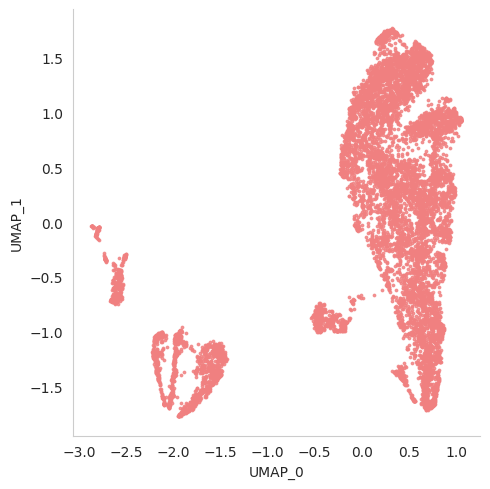

In [11]:
np.random.seed(42)
umap_emb=feature_clustering(30,0.01,'euclidean',data,True)

In [12]:
from fdc.clustering import Clustering

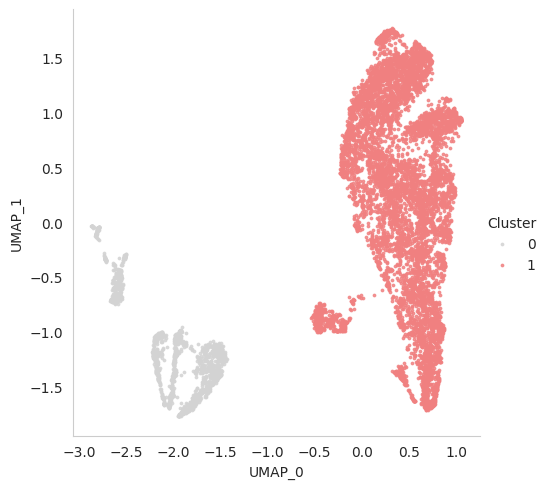

In [13]:
np.random.seed(42)
umap_clustering=Clustering(umap_emb,umap_emb,True)
umap_cluster_list,umap_cluster_counts=umap_clustering.K_means(2)

### Feature-type Distributed Clustering (FDC)

In [14]:
ord_list=['Drinks.alcohol', 'Smoking_stat','Has.refrigerator',
       'Has.bicycle', 'Has.motorcycle.scooter', 'Has.car.truck', 'Owns.livestock..herds.or.farm.animals','Frequency.takes.milk.or.curd',
       'Frequency.eats.pulses.or.beans',
       'Frequency.eats.dark.green.leafy.vegetable', 'Frequency.eats.fruits',
       'Frequency.eats.eggs', 'Frequency.eats.fish',
       'Frequency.eats.chicken.or.meat', 'Frequency.eats.fried.food',
       'Frequency.takes.aerated.drinks','Frequency.household.members.smoke.inside.the.house','Wealth.index',
       'Highest.educational.level','Currently.has.asthma','Currently.has.thyroid.disorder','Currently.has.heart.disease',
       'Currently.has.cancer', 'Suffers.from.TB','HTN']

cont_list=['Current.age','BMI','Hemoglobin.level..g.dl...1.decimal.','Time.to.get.to.water.source..minutes.']

nom_list=['Household.head.s.religion', 'Sex', 'Type.of.place.of.residence', 'Household.structure',
       'Type.of.caste.or.tribe.of.the.household.head','Type.of.cooking.fuel','Source.of.drinking.water']

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 15.00962 / 15.010s
FDC.normalize (clustering ORD): 20.35969 / 35.369s
FDC.normalize (clustering NOM): 36.03543 / 71.405s
FDC.normalize (concat): 0.00037 / 71.405s
FDC.normalize (umap 5 -> 2): 15.23527 / 86.640s
FDC.normalize (array -> DataFrame): 0.00030 / 86.641s


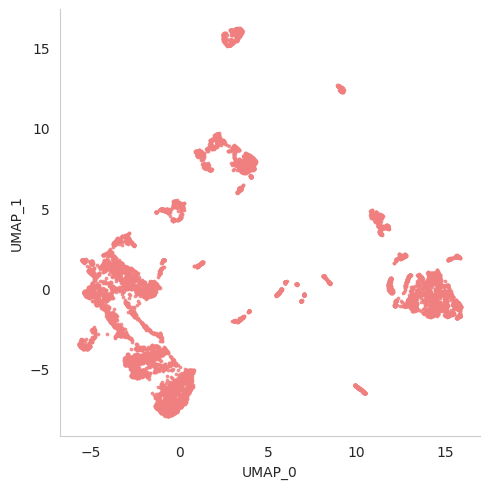

FDC.normalize (plotting): 0.41043 / 87.051s
FDC.normalize (array -> DataFrame): 0.00045 / 87.052s
FDC.normalize (total): 0.00001 / 87.052s


In [15]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)

fdc = FDC(clustering_cont=Clustering('euclidean',30,0.1)
          , clustering_ord=Clustering("canberra",30,0.1)
          , clustering_nom=Clustering('hamming',30,0.1)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(data,cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

### Clustering using K-means

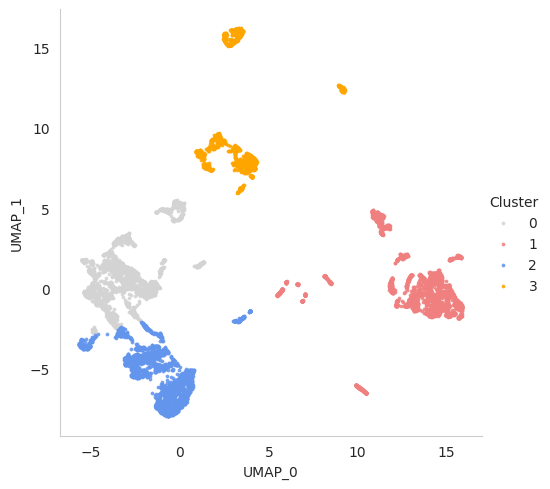

In [16]:
from fdc.clustering import *
np.random.seed(42)
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

In [17]:
cluster_counts

array([2813, 2783, 2769, 1760])

### Concatinating cluster labels as Target to original data

In [18]:
data["Target"]=cluster_list

In [19]:
data

,Drinks.alcohol,Smoking_stat,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Owns.livestock..herds.or.farm.animals,Frequency.takes.milk.or.curd,Frequency.eats.pulses.or.beans,Frequency.eats.dark.green.leafy.vegetable,...,Hemoglobin.level..g.dl...1.decimal.,Time.to.get.to.water.source..minutes.,Household.head.s.religion,Sex,Type.of.place.of.residence,Household.structure,Type.of.caste.or.tribe.of.the.household.head,Type.of.cooking.fuel,Source.of.drinking.water,Target
258196,0,0,1,1,1,0,0,2,2,1,...,11.1,10,0,1,1,0,4,3,4,3
188164,0,0,0,0,1,0,1,2,3,3,...,10.9,30,0,1,1,0,1,1,3,1
348270,0,0,1,1,1,0,0,2,2,3,...,12.3,0,1,1,0,0,1,3,3,2
469410,0,0,1,1,1,0,1,2,2,2,...,7.8,10,0,1,1,0,1,3,2,3
45365,0,0,1,0,0,0,0,0,2,3,...,12.6,0,1,1,0,1,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398124,1,1,1,0,0,0,0,3,2,2,...,15.4,10,0,0,0,0,4,3,4,3
351146,0,0,1,1,1,0,1,3,1,2,...,12.9,0,3,1,1,0,4,1,3,1
363318,0,0,1,1,0,0,0,3,2,3,...,15.5,0,0,1,0,0,2,3,2,2
62518,0,0,1,0,1,1,0,3,3,3,...,13.4,0,0,1,0,1,2,3,3,2


### Train-val split

In [20]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(np.array(data.drop(["Target"],axis=1)), np.array(cluster_list), test_size = 0.25, random_state = 42)

### Gradient boosting classifier for original traing data (Model-1)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)
model_1 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


In [22]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(model_1, train_features, train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.88610928 0.87491771 0.8676761  0.87022398 0.86495389]
Avg : 0.872776191950706


In [23]:
model_1.fit(train_features,  train_labels)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Preparing training data for synthetic data generation

In [24]:
train_features=pd.DataFrame(train_features)

In [25]:
train_features["Target"]=train_labels

In [26]:
values = ['Drinks.alcohol', 'Smoking_stat','Has.refrigerator',
       'Has.bicycle', 'Has.motorcycle.scooter', 'Has.car.truck', 'Owns.livestock..herds.or.farm.animals','Frequency.takes.milk.or.curd',
       'Frequency.eats.pulses.or.beans',
       'Frequency.eats.dark.green.leafy.vegetable', 'Frequency.eats.fruits',
       'Frequency.eats.eggs', 'Frequency.eats.fish',
       'Frequency.eats.chicken.or.meat', 'Frequency.eats.fried.food',
       'Frequency.takes.aerated.drinks','Frequency.household.members.smoke.inside.the.house','Wealth.index',
       'Highest.educational.level','Currently.has.asthma','Currently.has.thyroid.disorder','Currently.has.heart.disease',
       'Currently.has.cancer', 'Suffers.from.TB','HTN','Current.age','BMI','Hemoglobin.level..g.dl...1.decimal.','Time.to.get.to.water.source..minutes.','Household.head.s.religion', 'Sex', 'Type.of.place.of.residence', 'Household.structure',
       'Type.of.caste.or.tribe.of.the.household.head','Type.of.cooking.fuel','Source.of.drinking.water',"Target"]

In [27]:
train_features.to_csv('T2DM_training_data(semi_sup).csv',index=False)

In [28]:
hold_out_data=pd.DataFrame(test_features)
hold_out_data['Target']=test_labels
hold_out_data.columns=values
hold_out_data.to_csv('T2DM_hold_out__data(semi_sup).csv',index=False)

In [29]:
dicts = {}
for i in range(len(values)):
        dicts[values[i]]=i


In [30]:
train_features.rename(columns=dicts,inplace=True)


In [31]:
train_features

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,...,14.5,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,2
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,3.0,...,12.1,10.0,0.0,1.0,0.0,1.0,1.0,3.0,3.0,3
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,...,11.1,15.0,0.0,1.0,1.0,1.0,4.0,1.0,2.0,3
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,...,5.6,30.0,0.0,1.0,1.0,1.0,3.0,1.0,2.0,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,...,13.4,0.0,0.0,1.0,0.0,1.0,1.0,3.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7588,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,3.0,...,13.7,0.0,0.0,0.0,1.0,1.0,4.0,3.0,3.0,2
7589,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,...,11.2,2.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,0
7590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,...,9.6,0.0,0.0,1.0,0.0,1.0,4.0,3.0,4.0,1
7591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,...,13.1,30.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1


## NextConvGen

### FDC for searcing neighbors for synthetic data generation

In [32]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
fdc = FDC()
fdc.ord_list=list(range(data.shape[1]))[:25]
fdc.nom_list = list(range(data.shape[1]))[29:]
fdc.cont_list =list(range(data.shape[1]))[25:29]

In [33]:
train_features=np.array(train_features)

### Preapring and training NextConvGen model

In [34]:
gen = NextConvGeN(train_features.shape[1], neb=5, fdc=fdc)

In [35]:
gen.reset(train_features)

2023-04-11 16:59:49.247481: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-11 16:59:49.247500: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-11 16:59:49.247518: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f61d203ff696): /proc/driver/nvidia/version does not exist
2023-04-11 16:59:49.247671: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
gen.train(train_features)

FDC.normalize (init): 0.00001 / 0.000s
FDC.normalize (clustering CONT): 17.20484 / 17.205s
FDC.normalize (clustering ORD): 65.87411 / 83.079s
FDC.normalize (clustering NOM): 40.20649 / 123.285s
FDC.normalize (concat): 0.00052 / 123.286s
FDC.normalize (total): 0.00001 / 123.286s
|N| = (7593, 5)
|D| = (7593, 37)


### Generating 20000 synthetic points and randomly selecting the same legth of original training points for evaluation

In [37]:
from fdc.NN_models import *
np.random.seed(42)
syn_train_data = syn_data_gen(gen,20000,values)

In [38]:
def balanced_synthetic_data(org_data,syn_data):
    import math
    org_data_len = org_data.shape[0]
    class_counts = org_data.iloc[:,-1].value_counts()
    column_names = list( syn_data.columns)
    df_list=[]
    for i in range(len(class_counts)):
        m = len(syn_data[syn_data['Target']==i])

        if m < class_counts[i]:
            run=math.ceil(class_counts[i]/m)
            syn_data = syn_data_gen(gen,org_data_len*run,values)
        c_i=syn_data[syn_data['Target']==i].sample(n=int(class_counts[i]),axis=0,random_state=42)
        df_list.append(c_i)
    balanced_df=pd.concat(df_list,names=column_names)
    return balanced_df

In [39]:
syn_train_data=balanced_synthetic_data(pd.DataFrame(train_features),syn_train_data)

In [40]:
syn_train_data['Target'].value_counts()

0.0    1898
1.0    1898
2.0    1898
3.0    1898
Name: Target, dtype: int64

In [41]:
syn_train_data.to_csv('T2DM_NextConvGen_syn_data.csv',index=False)

In [42]:
np.random.seed(42)
syn_train_data=syn_train_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(syn_train_data)[0])]

syn_train_data.set_index(pd.Series(i), inplace=True)

In [43]:
syn_train_data

,Drinks.alcohol,Smoking_stat,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Owns.livestock..herds.or.farm.animals,Frequency.takes.milk.or.curd,Frequency.eats.pulses.or.beans,Frequency.eats.dark.green.leafy.vegetable,...,Hemoglobin.level..g.dl...1.decimal.,Time.to.get.to.water.source..minutes.,Household.head.s.religion,Sex,Type.of.place.of.residence,Household.structure,Type.of.caste.or.tribe.of.the.household.head,Type.of.cooking.fuel,Source.of.drinking.water,Target
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,...,10.126158,0.000000,1.0,1.0,1.0,0.0,4.0,1.0,3.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,...,9.868422,0.000000,0.0,1.0,0.0,1.0,1.0,3.0,2.0,2.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,...,12.571859,16.787531,0.0,1.0,1.0,1.0,4.0,1.0,1.0,3.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,...,12.398946,0.000000,0.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,3.0,...,14.342728,5.612651,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,...,11.876696,0.000000,1.0,1.0,0.0,0.0,1.0,3.0,3.0,2.0
7588,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,...,13.159216,0.000000,1.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0
7589,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,...,8.879525,0.000000,0.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0
7590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,2.0,...,12.730135,0.000000,1.0,1.0,0.0,1.0,1.0,3.0,3.0,0.0


In [ ]:
def exact_match_score(original_df, synthetic_df):
    original_data=original_df.drop('Target',axis=1,inplace=False)
    synthetic_data=synthetic_df.drop('Target',axis=1,inplace=False)
    n_matches = 0
    repeated=[]
    for i in range(synthetic_data.shape[0]):
        if (original_data == synthetic_data.iloc[i, :]).all(axis=1).any():
            repeated_data=synthetic_data.iloc[i, :]
            repeated.append(repeated_data)
            n_matches += 1    
    print('The number of data points repeated in the synthetic data are',n_matches / synthetic_data.shape[0])
    return pd.DataFrame(repeated)

In [ ]:
original_df=pd.read_csv('T2DM_training_data(semi_sup).csv')
original_df.columns=values

In [ ]:
exact_match_score(original_df,syn_train_data)

In [ ]:
len(syn_train_data[syn_train_data.duplicated(keep=False)])

### Train test split on synthetic data

In [44]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(syn_train_data.drop(["Target"],axis=1)), np.array(syn_train_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on NextConvGen generated synthetic training data  (Model-2)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
NextConvGen_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross Validation

In [46]:
score_lr=cross_val_score(NextConvGen_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.90781387 0.88674276 0.89815628 0.8928885  0.86731107]
Avg : 0.8905824953594479


In [47]:
NextConvGen_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [48]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.8588312541037427
Geometric mean of cluster 0 is 0.8591129761950762
Correctly predicted data points in cluster 0 is 88.14016172506739%


F1_Score of cluster 1 is 0.9044776119402985
Geometric mean of cluster 1 is 0.9046227178879952
Correctly predicted data points in cluster 1 is 92.09726443768997%


F1_Score of cluster 2 is 0.8421052631578947
Geometric mean of cluster 2 is 0.8427797568688796
Correctly predicted data points in cluster 2 is 87.71929824561403%


F1_Score of cluster 3 is 0.7731958762886598
Geometric mean of cluster 3 is 0.7826098791840771
Correctly predicted data points in cluster 3 is 66.96428571428571%


weigted average F1_Score of all clusters is 0.8510232274008741
weighted average Geometric mean of all clusters is 0.8529913729383206
weighted average of Correctly predicted data points in all clusters is 85.30805687203791%


### Case-2: Predicting validation data using Model-2


In [49]:
y=NextConvGen_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.8563899868247694
Geometric mean of cluster 0 is 0.8566048783639539
Correctly predicted data points in cluster 0 is 87.6010781671159%


F1_Score of cluster 1 is 0.8977443609022556
Geometric mean of cluster 1 is 0.8977941015655568
Correctly predicted data points in cluster 1 is 90.72948328267478%


F1_Score of cluster 2 is 0.8434596140100072
Geometric mean of cluster 2 is 0.8436667627152611
Correctly predicted data points in cluster 2 is 86.25730994152046%


F1_Score of cluster 3 is 0.7833537331701347
Geometric mean of cluster 3 is 0.7870417814679403
Correctly predicted data points in cluster 3 is 71.42857142857143%


weigted average F1_Score of all clusters is 0.8507211722514725
weighted average Geometric mean of all clusters is 0.8515055775557133
weighted average of Correctly predicted data points in all clusters is 85.18957345971565%


### Comparing predicted values from Case-1 & Case-2

In [50]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.9646756583172769
Geometric mean of cluster 0 is 0.9646806324511196
Correctly predicted data points in cluster 0 is 96.15877080665814%


F1_Score of cluster 1 is 0.9660265878877401
Geometric mean of cluster 1 is 0.9660529353943709
Correctly predicted data points in cluster 1 is 95.89442815249268%


F1_Score of cluster 2 is 0.9601648351648351
Geometric mean of cluster 2 is 0.9603179592923001
Correctly predicted data points in cluster 2 is 94.33198380566802%


F1_Score of cluster 3 is 0.9182209469153515
Geometric mean of cluster 3 is 0.9198136991044521
Correctly predicted data points in cluster 3 is 97.5609756097561%


weigted average F1_Score of all clusters is 0.9577015938114573
weighted average Geometric mean of all clusters is 0.9579613653337835
weighted average of Correctly predicted data points in all clusters is 95.73459715639811%


### UMAP on synthetic data

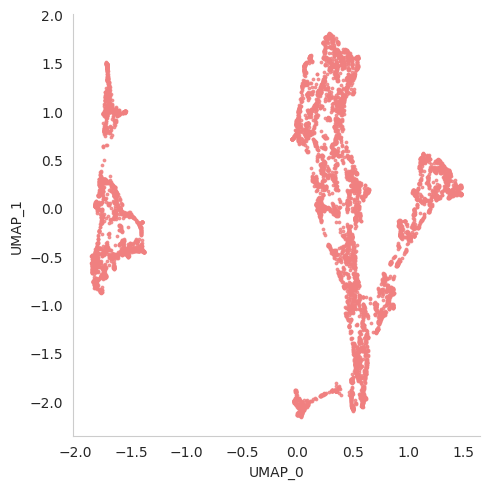

In [51]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(30,0.01,'euclidean',syn_train_data.drop(["Target"],axis=1),True)

### FDC on synthetic data

FDC.normalize (init): 0.00001 / 0.000s
FDC.normalize (clustering CONT): 16.08855 / 16.089s
FDC.normalize (clustering ORD): 17.91709 / 34.006s
FDC.normalize (clustering NOM): 43.45788 / 77.464s
FDC.normalize (concat): 0.00035 / 77.464s
FDC.normalize (umap 5 -> 2): 22.82702 / 100.291s
FDC.normalize (array -> DataFrame): 0.00028 / 100.291s


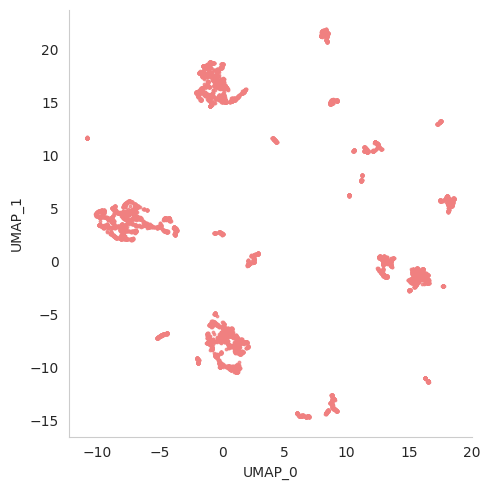

FDC.normalize (plotting): 0.41063 / 100.702s
FDC.normalize (array -> DataFrame): 0.00020 / 100.702s
FDC.normalize (total): 0.00001 / 100.702s


In [52]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',30,0.1)
          , clustering_ord=Clustering("canberra",30,0.1)
          , clustering_nom=Clustering('hamming',30,0.1)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(syn_train_data.drop('Target', axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

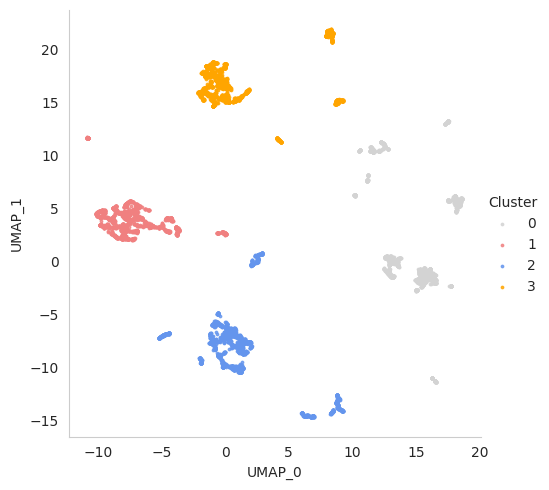

In [53]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

In [54]:
cluster_counts

array([1819, 1932, 2203, 1638])

## CTGAN

In [55]:
train_features= pd.DataFrame(train_features)

In [56]:
dicts = {}
for i in range(len(values)):
        dicts[i]=values[i]


In [57]:
train_features.rename(columns=dicts,inplace=True)


In [58]:
from sdv.tabular import CTGAN

In [59]:
gen=CTGAN()

In [60]:
gen.fit(train_features)

### Generating 1000 synthetic points and randomly selecting the same legth of original training points for evaluation

In [61]:
CTGAN_syn_data= gen.sample(num_rows=20000)

In [62]:
from fdc.NN_models import *
CTGAN_syn_data=balanced_synthetic_data_CTGAN(train_features,CTGAN_syn_data,gen)

In [63]:
CTGAN_syn_data.to_csv('T2DM_CTGAN_syn_data.csv',index=False)

In [64]:
np.random.seed(42)
CTGAN_syn_data=CTGAN_syn_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(CTGAN_syn_data)[0])]

CTGAN_syn_data.set_index(pd.Series(i), inplace=True)

### Train-test split on CTGAN generated synthetic data points

In [65]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(CTGAN_syn_data.drop(["Target"],axis=1)), np.array(CTGAN_syn_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on CTGAN generated synthetic training data  (Model-2)

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
CTGAN_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross validation

In [67]:
score_lr=cross_val_score(CTGAN_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.63125549 0.62598771 0.62071993 0.61018437 0.6344464 ]
Avg : 0.6245187789986283


In [68]:
CTGAN_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [69]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.8588312541037427
Geometric mean of cluster 0 is 0.8591129761950762
Correctly predicted data points in cluster 0 is 88.14016172506739%


F1_Score of cluster 1 is 0.9044776119402985
Geometric mean of cluster 1 is 0.9046227178879952
Correctly predicted data points in cluster 1 is 92.09726443768997%


F1_Score of cluster 2 is 0.8421052631578947
Geometric mean of cluster 2 is 0.8427797568688796
Correctly predicted data points in cluster 2 is 87.71929824561403%


F1_Score of cluster 3 is 0.7731958762886598
Geometric mean of cluster 3 is 0.7826098791840771
Correctly predicted data points in cluster 3 is 66.96428571428571%


weigted average F1_Score of all clusters is 0.8510232274008741
weighted average Geometric mean of all clusters is 0.8529913729383206
weighted average of Correctly predicted data points in all clusters is 85.30805687203791%


### Case-2: predicting validation data using Model-2


In [70]:
y=CTGAN_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.5167620605069502
Geometric mean of cluster 0 is 0.5289475279577901
Correctly predicted data points in cluster 0 is 42.58760107816711%


F1_Score of cluster 1 is 0.8941355674028941
Geometric mean of cluster 1 is 0.894137901334541
Correctly predicted data points in cluster 1 is 89.209726443769%


F1_Score of cluster 2 is 0.7286606523247746
Geometric mean of cluster 2 is 0.7295974590145683
Correctly predicted data points in cluster 2 is 76.75438596491229%


F1_Score of cluster 3 is 0.3477460901563937
Geometric mean of cluster 3 is 0.35324202691280204
Correctly predicted data points in cluster 3 is 42.1875%


weigted average F1_Score of all clusters is 0.6421693470882589
weighted average Geometric mean of all clusters is 0.646966388169711
weighted average of Correctly predicted data points in all clusters is 63.862559241706165%


### Comparing predicted values from Case-1 & Case-2

In [71]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.5689381933438986
Geometric mean of cluster 0 is 0.5857285502920533
Correctly predicted data points in cluster 0 is 45.96670934699104%


F1_Score of cluster 1 is 0.918474195961107
Geometric mean of cluster 1 is 0.9186615376956094
Correctly predicted data points in cluster 1 is 90.02932551319648%


F1_Score of cluster 2 is 0.82109479305741
Geometric mean of cluster 2 is 0.8211416330482811
Correctly predicted data points in cluster 2 is 82.99595141700405%


F1_Score of cluster 3 is 0.3784901758014478
Geometric mean of cluster 3 is 0.39972723437755164
Correctly predicted data points in cluster 3 is 55.79268292682927%


weigted average F1_Score of all clusters is 0.712210169812589
weighted average Geometric mean of all clusters is 0.7202044429111818
weighted average of Correctly predicted data points in all clusters is 69.94470774091627%


### UMAP on CTGAN synthetic data

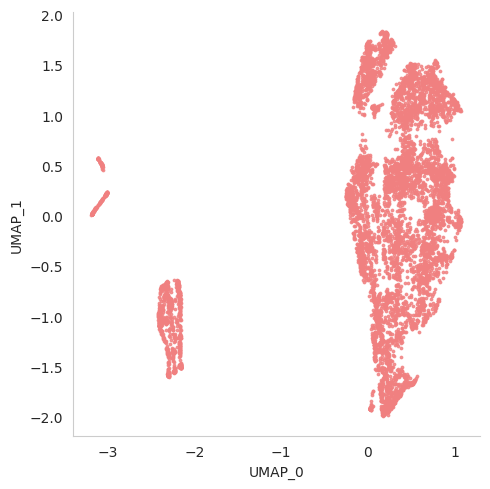

In [72]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(30,0.01,'euclidean',CTGAN_syn_data.drop(["Target"],axis=1),True)

### FDC on CTGAN synthetic data

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 14.81881 / 14.819s
FDC.normalize (clustering ORD): 17.60247 / 32.421s
FDC.normalize (clustering NOM): 43.42744 / 75.849s
FDC.normalize (concat): 0.00036 / 75.849s
FDC.normalize (umap 5 -> 2): 16.80850 / 92.658s
FDC.normalize (array -> DataFrame): 0.00028 / 92.658s


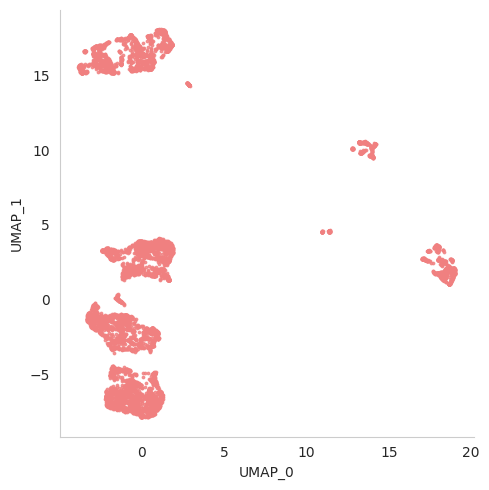

FDC.normalize (plotting): 0.39044 / 93.048s
FDC.normalize (array -> DataFrame): 0.00019 / 93.049s
FDC.normalize (total): 0.00001 / 93.049s


In [73]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',30,0.1)
          , clustering_ord=Clustering("canberra",30,0.1)
          , clustering_nom=Clustering('hamming',30,0.1)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(CTGAN_syn_data.drop('Target', axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

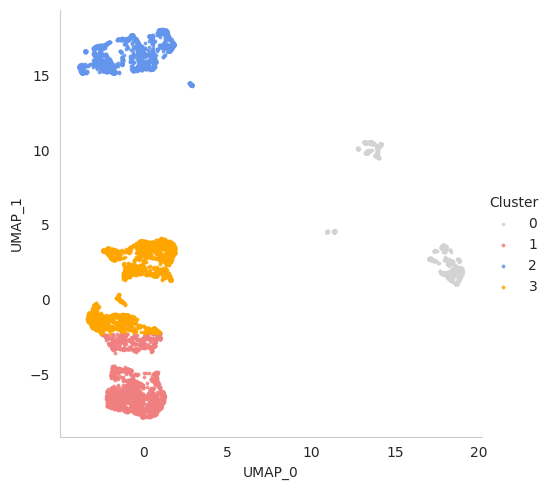

In [74]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

### CTAB GAN

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from library.generators.ctab import CtabGan

In [76]:
gen=CtabGan()

In [77]:
gen.reset(train_features)

In [78]:
gen.train(train_features)

100%|██████████| 10/10 [03:29<00:00, 20.94s/it]


### Generating 1000 synthetic points and randomly selecting the same legth of original training points for evaluation

In [79]:
CTABGAN_syn_data=  gen.generateData(20000)

In [80]:
CTABGAN_syn_data=pd.DataFrame(CTABGAN_syn_data)

In [81]:
CTABGAN_syn_data.rename(columns=dicts,inplace=True)
CTABGAN_syn_data

,Drinks.alcohol,Smoking_stat,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Owns.livestock..herds.or.farm.animals,Frequency.takes.milk.or.curd,Frequency.eats.pulses.or.beans,Frequency.eats.dark.green.leafy.vegetable,...,Hemoglobin.level..g.dl...1.decimal.,Time.to.get.to.water.source..minutes.,Household.head.s.religion,Sex,Type.of.place.of.residence,Household.structure,Type.of.caste.or.tribe.of.the.household.head,Type.of.cooking.fuel,Source.of.drinking.water,Target
0,-0.000993,0.000213,0.994702,0.999825,-0.005094,-0.000282,0.001248,1.999052,3.016759,3.006769,...,10.996827,-0.013011,-0.000517,1.002002,0.998949,1.001400,1.037886,3.005153,2.996143,0.996414
1,-0.001862,-0.000329,0.998074,1.001074,0.995040,-0.000323,0.003028,1.997807,2.990539,2.984857,...,14.732986,0.004883,-0.005301,1.001003,0.997525,-0.003557,0.993656,2.995609,1.999282,2.011266
2,-0.000973,-0.001042,0.000822,0.992864,0.997658,0.000581,0.007173,3.001796,1.089962,2.993393,...,10.917786,0.035710,0.978495,1.001685,-0.010595,0.996927,2.022185,1.002878,2.996292,-0.004522
3,-0.001478,-0.000343,-0.008683,1.004147,0.991371,-0.000625,0.996184,2.009621,2.970988,2.000338,...,14.313135,0.000251,-0.006760,0.997397,0.998037,-0.005319,0.990380,1.014632,1.998063,1.977359
4,-0.001093,0.000621,0.999026,0.996208,-0.004932,0.000265,0.001643,1.979973,2.020905,1.045387,...,12.349138,-0.079910,-0.002386,1.004133,-0.004429,1.006835,4.021372,3.001947,2.000663,2.022732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.000317,-0.000327,-0.001693,0.008492,0.000608,0.000241,0.007571,3.006836,0.998571,3.003426,...,15.706898,-0.038956,-0.006810,1.000280,0.000846,1.011457,0.993628,1.002600,2.996726,2.008579
19996,-0.000336,-0.000926,0.990768,-0.000134,0.989590,0.000578,0.001044,2.995032,2.997969,2.995451,...,12.245944,0.013110,-0.005977,0.999970,1.004115,-0.003230,1.025910,3.002584,3.002130,2.989722
19997,-0.001041,0.001073,-0.003173,0.002366,-0.004698,-0.000444,0.988572,1.018683,0.008094,2.000352,...,13.355493,10.088996,0.983227,0.997951,-0.006425,1.001346,1.018244,2.990417,2.997959,1.006635
19998,-0.000216,0.000524,0.994822,1.002644,-0.001384,-0.000915,0.003674,2.001410,1.064498,2.998743,...,11.942732,-0.053454,-0.007491,1.001232,0.004598,0.001756,4.066131,3.002627,2.999438,0.995724


In [82]:
descrete_list_1=values[:25]

In [83]:
descrete_list_2=values[29:]

In [84]:
descrete_list=[*descrete_list_1, *descrete_list_2]

In [85]:
descrete_list

['Drinks.alcohol',
 'Smoking_stat',
 'Has.refrigerator',
 'Has.bicycle',
 'Has.motorcycle.scooter',
 'Has.car.truck',
 'Owns.livestock..herds.or.farm.animals',
 'Frequency.takes.milk.or.curd',
 'Frequency.eats.pulses.or.beans',
 'Frequency.eats.dark.green.leafy.vegetable',
 'Frequency.eats.fruits',
 'Frequency.eats.eggs',
 'Frequency.eats.fish',
 'Frequency.eats.chicken.or.meat',
 'Frequency.eats.fried.food',
 'Frequency.takes.aerated.drinks',
 'Frequency.household.members.smoke.inside.the.house',
 'Wealth.index',
 'Highest.educational.level',
 'Currently.has.asthma',
 'Currently.has.thyroid.disorder',
 'Currently.has.heart.disease',
 'Currently.has.cancer',
 'Suffers.from.TB',
 'HTN',
 'Household.head.s.religion',
 'Sex',
 'Type.of.place.of.residence',
 'Household.structure',
 'Type.of.caste.or.tribe.of.the.household.head',
 'Type.of.cooking.fuel',
 'Source.of.drinking.water',
 'Target']

In [86]:
for i in descrete_list:
    CTABGAN_syn_data[i]=abs(np.round(CTABGAN_syn_data[i]))

In [87]:
CTABGAN_syn_data['Target']=CTABGAN_syn_data['Target'].astype('int')

In [88]:
CTABGAN_syn_data

,Drinks.alcohol,Smoking_stat,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Owns.livestock..herds.or.farm.animals,Frequency.takes.milk.or.curd,Frequency.eats.pulses.or.beans,Frequency.eats.dark.green.leafy.vegetable,...,Hemoglobin.level..g.dl...1.decimal.,Time.to.get.to.water.source..minutes.,Household.head.s.religion,Sex,Type.of.place.of.residence,Household.structure,Type.of.caste.or.tribe.of.the.household.head,Type.of.cooking.fuel,Source.of.drinking.water,Target
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0,3.0,...,10.996827,-0.013011,0.0,1.0,1.0,1.0,1.0,3.0,3.0,1
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,...,14.732986,0.004883,0.0,1.0,1.0,0.0,1.0,3.0,2.0,2
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,3.0,...,10.917786,0.035710,1.0,1.0,0.0,1.0,2.0,1.0,3.0,0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,3.0,2.0,...,14.313135,0.000251,0.0,1.0,1.0,0.0,1.0,1.0,2.0,2
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,...,12.349138,-0.079910,0.0,1.0,0.0,1.0,4.0,3.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,...,15.706898,-0.038956,0.0,1.0,0.0,1.0,1.0,1.0,3.0,2
19996,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0,3.0,...,12.245944,0.013110,0.0,1.0,1.0,0.0,1.0,3.0,3.0,3
19997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,...,13.355493,10.088996,1.0,1.0,0.0,1.0,1.0,3.0,3.0,1
19998,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,...,11.942732,-0.053454,0.0,1.0,0.0,0.0,4.0,3.0,3.0,1


In [89]:
from fdc.NN_models import *

In [90]:
def balanced_synthetic_data_CTABGAN(org_data,syn_data,model,descrete_list):
    org_data_len = org_data.shape[0]
    column_names = list( syn_data.columns)
    df_list=[]
    n = np.round(org_data_len/len(np.unique(org_data.iloc[:,-1])))
    for i in np.unique(org_data.iloc[:,-1]):
        m = len(syn_data[syn_data['Target']==i])

        if m < n:
            syn_data = model.generateData(10000*int(np.round(n/m)+2))
            
            syn_data = pd.DataFrame(syn_data,columns=column_names)
            for i in descrete_list:
                syn_data[i]=abs(np.round(syn_data[i]))
            syn_data['Target']=syn_data['Target'].astype('int')
            print(syn_data['Target'].value_counts())
            #print(syn_data)
        c_i=syn_data[syn_data['Target']==i]
        c_i=c_i.sample(n=int(n),axis=0)
        df_list.append(c_i)
    balanced_df=pd.concat(df_list,names=column_names)
    return balanced_df 

In [91]:

CTABGAN_syn_data=balanced_synthetic_data_CTABGAN(pd.DataFrame(train_features),CTABGAN_syn_data,gen, descrete_list)

In [92]:
CTABGAN_syn_data.to_csv('T2DM_CTABGAN_syn_data.csv',index=False)

In [93]:
np.random.seed(42)
CTABGAN_syn_data=CTABGAN_syn_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(CTABGAN_syn_data)[0])]

CTABGAN_syn_data.set_index(pd.Series(i), inplace=True)

### Train-test split on CTABGAN generated synthetic data points

In [94]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(CTABGAN_syn_data.drop(["Target"],axis=1)), np.array(CTABGAN_syn_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on CTABGAN generated synthetic training data  (Model-2)

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
CTABGAN_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross validation

In [96]:
score_lr=cross_val_score(CTABGAN_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.2475856  0.26514486 0.26514486 0.25812116 0.27680141]
Avg : 0.26255957882457864


In [97]:
CTABGAN_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [98]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.8588312541037427
Geometric mean of cluster 0 is 0.8591129761950762
Correctly predicted data points in cluster 0 is 88.14016172506739%


F1_Score of cluster 1 is 0.9044776119402985
Geometric mean of cluster 1 is 0.9046227178879952
Correctly predicted data points in cluster 1 is 92.09726443768997%


F1_Score of cluster 2 is 0.8421052631578947
Geometric mean of cluster 2 is 0.8427797568688796
Correctly predicted data points in cluster 2 is 87.71929824561403%


F1_Score of cluster 3 is 0.7731958762886598
Geometric mean of cluster 3 is 0.7826098791840771
Correctly predicted data points in cluster 3 is 66.96428571428571%


weigted average F1_Score of all clusters is 0.8510232274008741
weighted average Geometric mean of all clusters is 0.8529913729383206
weighted average of Correctly predicted data points in all clusters is 85.30805687203791%


### Case-2: predicting validation data using Model-2


In [99]:
y=CTABGAN_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.2828713574982231
Geometric mean of cluster 0 is 0.2832959077493112
Correctly predicted data points in cluster 0 is 26.819407008086255%


F1_Score of cluster 1 is 0.30446194225721784
Geometric mean of cluster 1 is 0.3073378806144509
Correctly predicted data points in cluster 1 is 35.25835866261398%


F1_Score of cluster 2 is 0.14986619090098127
Geometric mean of cluster 2 is 0.15364219983152877
Correctly predicted data points in cluster 2 is 12.280701754385964%


F1_Score of cluster 3 is 0.11067193675889328
Geometric mean of cluster 3 is 0.1114062274638653
Correctly predicted data points in cluster 3 is 12.5%


weigted average F1_Score of all clusters is 0.22208373124533426
weighted average Geometric mean of all clusters is 0.2241055069442634
weighted average of Correctly predicted data points in all clusters is 22.55134281200632%


### Comparing predicted values from Case-1 & Case-2

In [100]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.30567081604426
Geometric mean of cluster 0 is 0.30665915461433246
Correctly predicted data points in cluster 0 is 28.297055057618437%


F1_Score of cluster 1 is 0.330749354005168
Geometric mean of cluster 1 is 0.33311089090223023
Correctly predicted data points in cluster 1 is 37.5366568914956%


F1_Score of cluster 2 is 0.1494057724957555
Geometric mean of cluster 2 is 0.15464391992075696
Correctly predicted data points in cluster 2 is 11.875843454790823%


F1_Score of cluster 3 is 0.09865470852017938
Geometric mean of cluster 3 is 0.10230013401326334
Correctly predicted data points in cluster 3 is 13.414634146341465%


weigted average F1_Score of all clusters is 0.23987693071724536
weighted average Geometric mean of all clusters is 0.24282307107691387
weighted average of Correctly predicted data points in all clusters is 24.052132701421797%


### UMAP on CTABGAN synthetic data

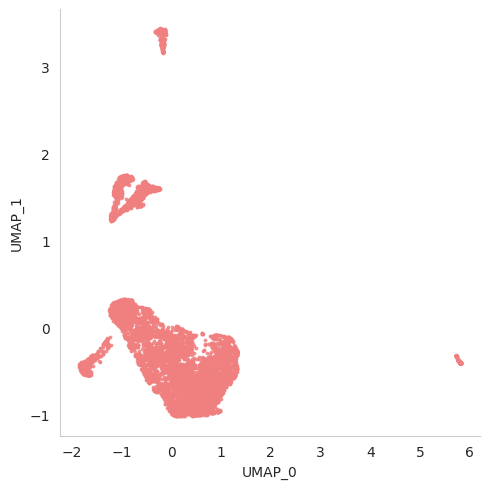

In [101]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(30,0.01,'euclidean',CTABGAN_syn_data.drop(["Target"],axis=1),True)

### FDC on CTABGAN synthetic data

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 15.24741 / 15.247s
FDC.normalize (clustering ORD): 17.30398 / 32.551s
FDC.normalize (clustering NOM): 42.97393 / 75.525s
FDC.normalize (concat): 0.00036 / 75.526s
FDC.normalize (umap 5 -> 2): 15.85857 / 91.384s
FDC.normalize (array -> DataFrame): 0.00028 / 91.385s


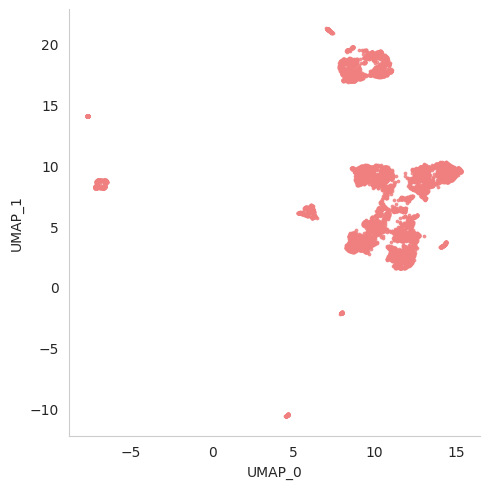

FDC.normalize (plotting): 0.43969 / 91.824s
FDC.normalize (array -> DataFrame): 0.00031 / 91.825s
FDC.normalize (total): 0.00001 / 91.825s


In [102]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',30,0.1)
          , clustering_ord=Clustering("canberra",30,0.1)
          , clustering_nom=Clustering('hamming',30,0.1)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(CTABGAN_syn_data.drop('Target', axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

### tabddpm

In [122]:

Tabddpm_syn_data=pd.read_csv('T2DM_synth_data_tddpm.csv')
Tabddpm_syn_data.drop(['Unnamed: 0'],axis=1,inplace=True)



In [123]:
Tabddpm_syn_data['Target'].value_counts()

1    7261
0    7221
2    7132
3    4386
Name: Target, dtype: int64

In [124]:
def balanced_synthetic_data(org_data,syn_data):
    import math
    org_data_len = org_data.shape[0]
    class_counts = org_data.iloc[:,-1].value_counts()
    column_names = list( syn_data.columns)
    df_list=[]
    for i in range(len(class_counts)):
        c_i=syn_data[syn_data['Target']==i].sample(n=int(class_counts[i]),axis=0,random_state=42)
        df_list.append(c_i)
    balanced_df=pd.concat(df_list,names=column_names)
    return balanced_df

In [125]:
Tabddpm_syn_data=balanced_synthetic_data(pd.DataFrame(train_features),Tabddpm_syn_data)

In [126]:
Tabddpm_syn_data['Target'].value_counts()

0    1898
1    1898
2    1898
3    1898
Name: Target, dtype: int64

In [127]:
Tabddpm_syn_data.to_csv('T2DM_Tabddpm_syn_data(semi_sup).csv',index=False)

In [128]:
#np.random.seed(42)
Tabddpm_syn_data=Tabddpm_syn_data.sample(frac=1) #Shuffle the data se
#np.random.seed(42)
i=[x for x in range(np.shape(Tabddpm_syn_data)[0])]

Tabddpm_syn_data.set_index(pd.Series(i), inplace=True)

In [129]:
syn_train_data

,Drinks.alcohol,Smoking_stat,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Owns.livestock..herds.or.farm.animals,Frequency.takes.milk.or.curd,Frequency.eats.pulses.or.beans,Frequency.eats.dark.green.leafy.vegetable,...,Hemoglobin.level..g.dl...1.decimal.,Time.to.get.to.water.source..minutes.,Household.head.s.religion,Sex,Type.of.place.of.residence,Household.structure,Type.of.caste.or.tribe.of.the.household.head,Type.of.cooking.fuel,Source.of.drinking.water,Target
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,...,10.126158,0.000000,1.0,1.0,1.0,0.0,4.0,1.0,3.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,...,9.868422,0.000000,0.0,1.0,0.0,1.0,1.0,3.0,2.0,2.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,...,12.571859,16.787531,0.0,1.0,1.0,1.0,4.0,1.0,1.0,3.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,...,12.398946,0.000000,0.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,3.0,...,14.342728,5.612651,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,...,11.876696,0.000000,1.0,1.0,0.0,0.0,1.0,3.0,3.0,2.0
7588,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,...,13.159216,0.000000,1.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0
7589,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,...,8.879525,0.000000,0.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0
7590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,2.0,...,12.730135,0.000000,1.0,1.0,0.0,1.0,1.0,3.0,3.0,0.0


### Train test split on synthetic data

In [130]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(Tabddpm_syn_data.drop(["Target"],axis=1)), np.array(Tabddpm_syn_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on Tabddpm generated synthetic training data  (Model-2)

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
Tabddpm_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross Validation

In [132]:
score_lr=cross_val_score(Tabddpm_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.87884109 0.85074627 0.90079017 0.89113257 0.89630931]
Avg : 0.8835638822325876


In [133]:
Tabddpm_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [134]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.8588312541037427
Geometric mean of cluster 0 is 0.8591129761950762
Correctly predicted data points in cluster 0 is 88.14016172506739%


F1_Score of cluster 1 is 0.9044776119402985
Geometric mean of cluster 1 is 0.9046227178879952
Correctly predicted data points in cluster 1 is 92.09726443768997%


F1_Score of cluster 2 is 0.8421052631578947
Geometric mean of cluster 2 is 0.8427797568688796
Correctly predicted data points in cluster 2 is 87.71929824561403%


F1_Score of cluster 3 is 0.7731958762886598
Geometric mean of cluster 3 is 0.7826098791840771
Correctly predicted data points in cluster 3 is 66.96428571428571%


weigted average F1_Score of all clusters is 0.8510232274008741
weighted average Geometric mean of all clusters is 0.8529913729383206
weighted average of Correctly predicted data points in all clusters is 85.30805687203791%


### Case-2: Predicting validation data using Model-2


In [135]:
y=Tabddpm_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.37076357697019197
Geometric mean of cluster 0 is 0.40340115716362135
Correctly predicted data points in cluster 0 is 61.18598382749326%


F1_Score of cluster 1 is 0.1456953642384106
Geometric mean of cluster 1 is 0.1502765895877537
Correctly predicted data points in cluster 1 is 11.702127659574469%


F1_Score of cluster 2 is 0.05142083897158321
Geometric mean of cluster 2 is 0.09795896894087644
Correctly predicted data points in cluster 2 is 2.7777777777777777%


F1_Score of cluster 3 is 0.20024420024420023
Geometric mean of cluster 3 is 0.20113511149629465
Correctly predicted data points in cluster 3 is 18.303571428571427%


weigted average F1_Score of all clusters is 0.19583545787785198
weighted average Geometric mean of all clusters is 0.21931995231834459
weighted average of Correctly predicted data points in all clusters is 24.96050552922591%


### Comparing predicted values from Case-1 & Case-2

In [136]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.3842443729903537
Geometric mean of cluster 0 is 0.41398596618898825
Correctly predicted data points in cluster 0 is 61.20358514724712%


F1_Score of cluster 1 is 0.1332099907493062
Geometric mean of cluster 1 is 0.1380237622610374
Correctly predicted data points in cluster 1 is 10.557184750733137%


F1_Score of cluster 2 is 0.045226130653266326
Geometric mean of cluster 2 is 0.08916246290928742
Correctly predicted data points in cluster 2 is 2.42914979757085%


F1_Score of cluster 3 is 0.14878397711015737
Geometric mean of cluster 3 is 0.14906629830773577
Correctly predicted data points in cluster 3 is 15.853658536585366%


weigted average F1_Score of all clusters is 0.1869106541479838
weighted average Geometric mean of all clusters is 0.21027582003015272
weighted average of Correctly predicted data points in all clusters is 24.486571879936804%


### UMAP on synthetic data

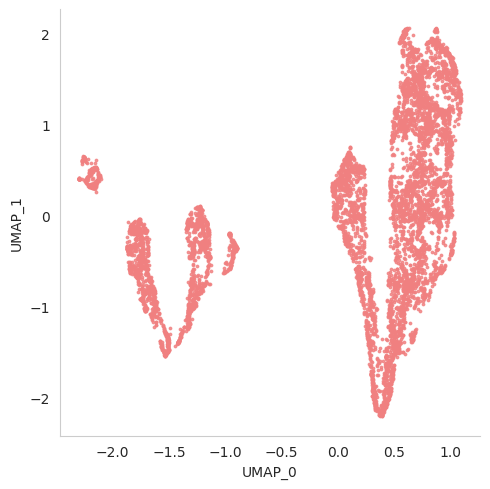

In [137]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(30,0.01,'euclidean',Tabddpm_syn_data.drop(["Target"],axis=1),True)

### FDC on synthetic data

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 15.30814 / 15.308s
FDC.normalize (clustering ORD): 18.70535 / 34.014s
FDC.normalize (clustering NOM): 44.11349 / 78.127s
FDC.normalize (concat): 0.00031 / 78.127s
FDC.normalize (umap 5 -> 2): 17.02163 / 95.149s
FDC.normalize (array -> DataFrame): 0.00028 / 95.149s


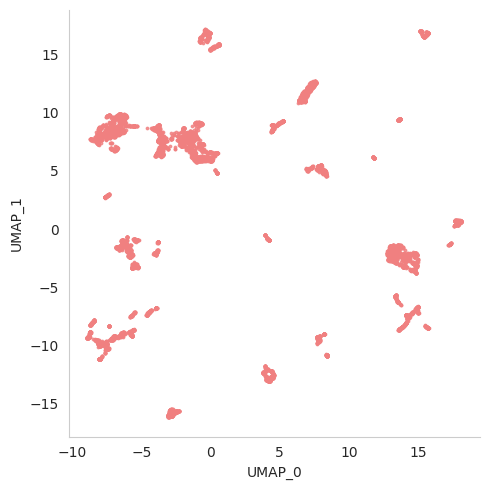

FDC.normalize (plotting): 0.39493 / 95.544s
FDC.normalize (array -> DataFrame): 0.00023 / 95.544s
FDC.normalize (total): 0.00001 / 95.544s


In [138]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',30,0.1)
          , clustering_ord=Clustering("canberra",30,0.1)
          , clustering_nom=Clustering('hamming',30,0.1)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(Tabddpm_syn_data.drop('Target', axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

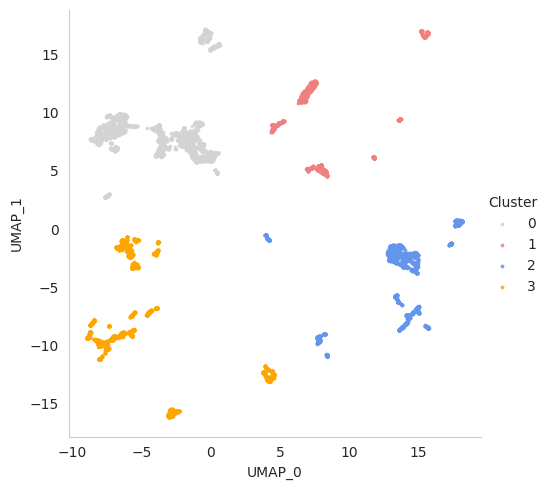

In [139]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

In [140]:
cluster_counts

array([2873, 1029, 1676, 2014])